In [33]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from IPython.display import clear_output
np.set_printoptions(suppress=True)

from imblearn.over_sampling import ADASYN, SMOTE
from imblearn.under_sampling  import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

from sklearn import metrics
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV, cross_validate
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import f1_score, precision_recall_curve, fbeta_score
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import LinearSVC, SVC

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.dummy import DummyClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb

from mlxtend.plotting import plot_decision_regions
%matplotlib inline
%precision 3

'%.3f'

In [74]:
with open('modeling_data_final','rb') as read_file:
    df_modeling = pickle.load(read_file)

In [75]:
df_modeling.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_smokes,heart_disease_prob
0,3.0,0,0,95.12,18.0,0,0,1,1,0,0,0,0,0,1,1,0,0,0.054687
1,58.0,1,0,87.96,39.2,0,0,1,0,1,0,0,1,0,0,0,1,0,0.801843
2,8.0,0,0,110.89,17.6,0,1,0,1,0,0,0,1,0,0,0,1,0,0.121872
3,70.0,0,0,69.04,35.9,0,1,0,0,1,0,0,1,0,0,1,0,0,0.771557
4,14.0,0,0,161.28,19.1,0,0,1,1,0,0,1,0,0,0,1,0,0,0.060416


In [76]:
df_modeling = df_modeling.drop('heart_disease', axis = 1)

In [77]:
df_modeling = df_modeling.loc[:,['age', 'bmi', 'avg_glucose_level', 'gender_Male', 'gender_Female', 'ever_married_No', 'ever_married_Yes', 
                           'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children',
                          'Residence_type_Rural', 'Residence_type_Urban', 'smoking_status_smokes', 'hypertension', 'heart_disease_prob', 'stroke']]

In [79]:
df_modeling.columns = ['Age', 'BMI', 'Average Glucose Level', 'Male', 'Female', 'Not Married', 'Married', 'Government Job', 'Never Worked',
                   'Private Work', 'Self Employed', 'Full-Time Mother', 'Residence-Rural', 'Residence-Urban', 'Smoker', 'Hypertension', 
                    'Heart Disease Probability', 'Stroke']

In [82]:
df_modeling.head()

,Age,BMI,Average Glucose Level,Male,Female,Not Married,Married,Government Job,Never Worked,Private Work,Self Employed,Full-Time Mother,Residence-Rural,Residence-Urban,Smoker,Hypertension,Heart Disease Probability,Stroke
0,3.0,18.0,95.12,1,0,1,0,0,0,0,0,1,1,0,0,0,0.054687,0
1,58.0,39.2,87.96,1,0,0,1,0,0,1,0,0,0,1,0,1,0.801843,0
2,8.0,17.6,110.89,0,1,1,0,0,0,1,0,0,0,1,0,0,0.121872,0
3,70.0,35.9,69.04,0,1,0,1,0,0,1,0,0,1,0,0,0,0.771557,0
4,14.0,19.1,161.28,1,0,1,0,0,1,0,0,0,1,0,0,0,0.060416,0


In [81]:
X = df_modeling.drop('Stroke', axis = 1)
y = df_modeling.Stroke

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=30)

In [84]:
ros = RandomOverSampler(random_state=30)
X_train_ros, y_train_ros = ros.fit_sample(X_train,y_train)
lr_ros = LogisticRegression(solver='liblinear', max_iter = 400)
lr_ros.fit(X_train_ros, y_train_ros)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=400,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
recall_score(y_test, lr_ros.predict(X_test))

0.8513513513513513

## Modeling with Random Oversampler (will try others later)

In [13]:
def print_classification_metrics(model_list, X_test, y_test):
    for model in model_list:
        predictions = model.predict(X_test)
        recall = recall_score(y_test, predictions)
        specificity = recall_score(y_test, predictions, pos_label = 0)
        print(type(model).__name__)
        print('Precision: ', precision_score(y_test, predictions))
        print('Recall: ', recall)
        print('Specificity: ', specificity)
        print('F1 Score: ', f1_score(y_test, predictions))
        print('Accuracy: ', accuracy_score(y_test, predictions))
        print('ROC: ', roc_auc_score(y_test, predictions))
        print(confusion_matrix(y_test, predictions))
        print('Custom score: ', 2*recall*specificity/(recall+specificity))
        print('')

In [111]:
#Logistic Regression
model_log = LogisticRegression(solver='liblinear', max_iter = 400, C=0.01, random_state=30)
model_log.fit(X_train_ros, y_train_ros)

#kNN
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train_ros, y_train_ros)

#Bernoulli Bayes
nb_bern = BernoulliNB()
nb_bern.fit(X_train_ros, y_train_ros)

#Gaussian Bayes
nb_gauss = GaussianNB()
nb_gauss.fit(X_train_ros, y_train_ros)

#Random Forest
model_forest = RandomForestClassifier(n_estimators=1000)
model_forest.fit(X_train_ros, y_train_ros)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [112]:
print_classification_metrics([model_log, model_knn, nb_bern, nb_gauss, model_forest], X_test, y_test)

LogisticRegression
Precision:  0.05463081519419548
Recall:  0.8648648648648649
Specificity:  0.7311566937735162
F1 Score:  0.10276997189883583
Accuracy:  0.7335161559556457
ROC:  0.7980107793191906
[[6024 2215]
 [  20  128]]
Custom score:  0.792410016936054

KNeighborsClassifier
Precision:  0.04887218045112782
Recall:  0.08783783783783784
Specificity:  0.9692923898531375
F1 Score:  0.06280193236714976
Accuracy:  0.9537379277453202
ROC:  0.5285651138454877
[[7986  253]
 [ 135   13]]
Custom score:  0.16107863634424202

BernoulliNB
Precision:  0.024822012699634403
Recall:  0.8716216216216216
Specificity:  0.3848768054375531
F1 Score:  0.048269410664172126
Accuracy:  0.3934660784547514
ROC:  0.6282492135295873
[[3171 5068]
 [  19  129]]
Custom score:  0.5339711344727861

GaussianNB
Precision:  0.029358169669973677
Recall:  0.9797297297297297
Specificity:  0.4181332686005583
F1 Score:  0.05700805976017299
Accuracy:  0.428043400500775
ROC:  0.6989314991651441
[[3445 4794]
 [   3  145]]
Custo

#### Logistic Regression is the most promising, so let's tune it

In [16]:
np.linspace(0.001,1, 100)

array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.062, 0.072, 0.082,
       0.092, 0.102, 0.112, 0.122, 0.132, 0.142, 0.152, 0.162, 0.173,
       0.183, 0.193, 0.203, 0.213, 0.223, 0.233, 0.243, 0.253, 0.263,
       0.273, 0.284, 0.294, 0.304, 0.314, 0.324, 0.334, 0.344, 0.354,
       0.364, 0.374, 0.384, 0.395, 0.405, 0.415, 0.425, 0.435, 0.445,
       0.455, 0.465, 0.475, 0.485, 0.495, 0.506, 0.516, 0.526, 0.536,
       0.546, 0.556, 0.566, 0.576, 0.586, 0.596, 0.606, 0.617, 0.627,
       0.637, 0.647, 0.657, 0.667, 0.677, 0.687, 0.697, 0.707, 0.717,
       0.728, 0.738, 0.748, 0.758, 0.768, 0.778, 0.788, 0.798, 0.808,
       0.818, 0.828, 0.839, 0.849, 0.859, 0.869, 0.879, 0.889, 0.899,
       0.909, 0.919, 0.929, 0.939, 0.95 , 0.96 , 0.97 , 0.98 , 0.99 ,
       1.   ])

#### Use grid search and cross-val to check over/under-fitting and general performance

In [17]:
logistic_grid_params = {'C': np.linspace(0.001,1, 100),
                            'class_weight': [None, 'balanced'],
                            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
                        }

In [18]:
grid_log = RandomizedSearchCV(estimator=LogisticRegression(random_state=30, max_iter=300, verbose=2, n_jobs=-1), 
                              param_distributions=logistic_grid_params, n_iter=100, cv=5, verbose=2, random_state=30, n_jobs = -1, scoring = 'recall')
grid_log.fit(X_train_ros, y_train_ros)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  5.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.0s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=300,
                                                multi_class='warn', n_jobs=-1,
                                                penalty='l2', random_state=30,
                                                solver='warn', tol=0.0001,
                                                verbose=2, warm_start=False),
                   iid='warn', n_iter=100, n_jobs=-1,
                   param_distributions={...
       0.728, 0.738, 0.748, 0.758, 0.768, 0.778, 0.788, 0.798, 0.808,
       0.818, 0.828, 0.839, 0.849, 0.859, 0.869, 0.879, 0.889, 0.899,
       0.909, 0.919, 0.929, 0.939, 0.95 , 0.96 , 0.97 , 0.98 , 0.99 ,
       1.   ]),
       

In [114]:
new_logistic_grid_params = {'C': np.linspace(0.001,0.3, 50),
                            'solver': ['newton-cg', 'lbfgs', 'liblinear']
                        }

In [117]:
full_grid_log = GridSearchCV(estimator=LogisticRegression(random_state=30, max_iter=400, n_jobs=-1),
                            param_grid=new_logistic_grid_params, cv=5, verbose=2, n_jobs = -1, scoring = 'recall')
full_grid_log.fit(X_train_ros, y_train_ros)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   52.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  4.3min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=400, multi_class='warn',
                                          n_jobs=-1, penalty='l2',
                                          random_state=30, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([0.001, 0.007, 0.0...
       0.056, 0.062, 0.068, 0.074, 0.08 , 0.086, 0.093, 0.099, 0.105,
       0.111, 0.117, 0.123, 0.129, 0.135, 0.141, 0.147, 0.154, 0.16 ,
       0.166, 0.172, 0.178, 0.184, 0.19 , 0.196, 0.202, 0.208, 0.215,
       0.221, 0.227, 0.233, 0.239, 0.245, 0.251, 0.257, 0.263, 0.269,
       0.27

In [118]:
full_grid_log.best_params_

{'C': 0.001, 'solver': 'newton-cg'}

In [127]:
test_log = LogisticRegression(solver='newton-cg', max_iter = 400, C=1, random_state=30)
test_log.fit(X_train_ros, y_train_ros)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=400,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=30, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [128]:
print_classification_metrics([test_log], X_test, y_test)

LogisticRegression
Precision:  0.0546875
Recall:  0.8513513513513513
Specificity:  0.7356475300400535
F1 Score:  0.10277324632952692
Accuracy:  0.7376892810301657
ROC:  0.7934994406957023
[[6061 2178]
 [  22  126]]
Custom score:  0.7892816134423212



In [130]:
np.mean(cross_val_score(LogisticRegression(solver='liblinear', max_iter = 400, C=0.01, random_state=30), X_train_ros, y_train_ros, cv=5, scoring = 'recall'))

0.8246545386122486

In [19]:
grid_log.best_params_

{'solver': 'newton-cg', 'class_weight': None, 'C': 0.001}

In [134]:
champ_model = LogisticRegression(solver = 'newton-cg', C = 0.001, max_iter=400)
champ_model.fit(X_train_ros, y_train_ros)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=400,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [133]:
print_classification_metrics([champ_model], X_test, y_test)

LogisticRegression
Precision:  0.05348737697903295
Recall:  0.8445945945945946
Specificity:  0.7315208156329651
F1 Score:  0.1006036217303823
Accuracy:  0.7335161559556457
ROC:  0.7880577051137799
[[6027 2212]
 [  23  125]]
Custom score:  0.7840016317432336



In [131]:
np.mean(cross_val_score(LogisticRegression(solver = 'newton-cg', C = 0.001, max_iter=400), X_train_ros, y_train_ros, cv=5, scoring='recall'))

0.8323702400957389

In [36]:
cv_results_logistic = cross_validate(LogisticRegression(solver = 'newton-cg', C = 0.001, max_iter=300), X_train_ros, y_train_ros, cv=5, scoring = 'recall', return_estimator=True, n_jobs=-1, verbose = 2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.3s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished


(0, 1)

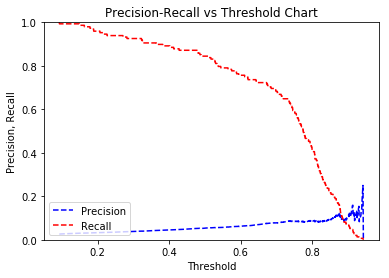

In [137]:
predictions=champ_model.predict(X_test) 

probabilities=champ_model.predict_proba(X_test) 
  

precision, recall, thresholds = precision_recall_curve(y_test, probabilities[:, 1]) 


plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

##### No under or over-fitting present. Looks like a stable model. A higher recall and specificty would be nice though. I'll try and see if I can get Random Forest to stop overfitting

In [100]:
forest = RandomForestClassifier(n_estimators=2000, max_depth=5, random_state=30, bootstrap=True)
forest.fit(X_train_ros, y_train_ros)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=None, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)

In [107]:
print_classification_metrics([forest], X_test, y_test)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

##### Successfully stopped it from overfitting (maybe). Let's use cross-validate to double check

In [47]:
cross_val_score(RandomForestClassifier(n_estimators=2000, max_depth=5, random_state=30, bootstrap=True, n_jobs=-1), X_train_ros, y_train_ros, cv=5, scoring = 'recall', n_jobs=-1, verbose = 2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   48.5s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   50.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   50.0s finished


array([0.875, 0.887, 0.886, 0.893, 0.888])

##### Now for grid search. This will take a LONG time

In [99]:
#parameters

forest_grid_params = {
 'max_depth': [3, 5, 8, 10, 12, 15],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 }

In [102]:
grid_forest = RandomizedSearchCV(RandomForestClassifier(bootstrap = True, n_estimators = 2000, random_state=30, n_jobs=-1), 
                              param_distributions=forest_grid_params, n_iter=100, cv=5, verbose=2, random_state=30, n_jobs = -1, scoring = 'recall')
grid_forest.fit(X_train_ros, y_train_ros)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  5.5min
/Users/lawrencewang/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/lawrencewang/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/lawrencewang/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memo

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=2000,
                                                    n_jobs=-1, oo

In [103]:
grid_forest.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 12}

In [104]:
forest = RandomForestClassifier(n_estimators=2000, max_depth=12, min_samples_split=2, min_samples_leaf=4, 
                                max_features='sqrt', random_state=30, bootstrap=True)
forest.fit(X_train_ros, y_train_ros)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=12, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=None, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)

In [106]:
recall_score(y_test, forest.predict(X_test))

0.4527027027027027

In [108]:
print_classification_metrics([forest], X_test, y_test)

RandomForestClassifier
Precision:  0.06993736951983298
Recall:  0.4527027027027027
Specificity:  0.8918558077436582
F1 Score:  0.12115732368896925
Accuracy:  0.8841063550733278
ROC:  0.6722792552231804
[[7348  891]
 [  81   67]]
Custom score:  0.6005622387569022



#### Using a standard scaler on champ model to make coefficients interpretable

In [138]:
std = StandardScaler()

In [139]:
X_train_scaled = std.fit_transform(X_train_ros)

In [141]:
champ_model_scaled = LogisticRegression(solver = 'newton-cg', C = 0.001, max_iter=400)
champ_model_scaled.fit(X_train_scaled, y_train_ros)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=400,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [142]:
champ_model_scaled.coef_

array([[ 1.237, -0.047,  0.233,  0.028, -0.028, -0.015,  0.015, -0.065,
        -0.059,  0.058,  0.061, -0.117, -0.054,  0.054,  0.082,  0.061,
         0.347]])

In [148]:
list(zip(champ_model_scaled.coef_, np.array(X_train.columns)))

[(array([ 1.237, -0.047,  0.233,  0.028, -0.028, -0.015,  0.015, -0.065,
         -0.059,  0.058,  0.061, -0.117, -0.054,  0.054,  0.082,  0.061,
          0.347]), 'Age')]

In [145]:
np.array(X_train.columns)

array(['Age', 'BMI', 'Average Glucose Level', 'Male', 'Female',
       'Not Married', 'Married', 'Government Job', 'Never Worked',
       'Private Work', 'Self Employed', 'Full-Time Mother',
       'Residence-Rural', 'Residence-Urban', 'Smoker', 'Hypertension',
       'Heart Disease Probability'], dtype=object)

### Prepare for output to Flask

In [96]:
champ_model.feature_names = list(df_modeling.columns)[0:17]

In [97]:
champ_model.feature_names

['Age',
 'BMI',
 'Average Glucose Level',
 'Male',
 'Female',
 'Not Married',
 'Married',
 'Government Job',
 'Never Worked',
 'Private Work',
 'Self Employed',
 'Full-Time Mother',
 'Residence-Rural',
 'Residence-Urban',
 'Smoker',
 'Hypertension',
 'Heart Disease Probability']

In [98]:
with open('stroke_predictor', 'wb') as to_write:
    pickle.dump(champ_model, to_write)